In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

train_df['avg_pos_word'] = train_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
train_df['avg_neg_word'] = train_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
train_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)

train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,0.000000,0.308559,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,0.009009,0.096724,0.169741
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,0.033333,0.067060,0.093065
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,0.000000,-0.077627,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,0.000000,0.368011,0.000000


In [3]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std', 'prod_review_count',
       'prod_star_rating_mean', 'prod_star_rating_std', 'pos_sim', 'neg_sim',
       'avg_pos_word', 'avg_neg_word'],
      dtype='object')

In [4]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [5]:
temp = train_df[train_df.positive == 0]
temp = pd.concat([temp, train_df[train_df.positive == 1][:14296]]) #9531
train_df = temp

In [6]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.400008
1    0.599992
dtype: float64

In [7]:
len(train_df[train_df.positive == 1]) / len(train_df)

0.5999916061610777

In [8]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)

test_df['avg_pos_word'] = test_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
test_df['avg_neg_word'] = test_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
test_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,0.012295,-0.031375,-0.011993
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,0.049808,0.933571,0.547893
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,0.005208,0.172577,0.136230
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,0.059514,0.250885,0.003912
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,0.003460,0.039631,-0.029838


In [9]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [10]:
test_df_og = test_df.copy()
temp = test_df[test_df.positive == 0]
temp = pd.concat([temp, test_df[test_df.positive == 1][:5359]]) # 3573
test_df = temp

In [11]:
len(test_df[test_df.positive == 1]) / len(test_df)

0.5999776085982983

In [12]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [13]:
is_NaN = train_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word


In [14]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 0.5):
            pos_count += 1
        if (preds[i] > 0.5 and test.iloc[i] > 0.5):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] <= 0.5):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 0.5 and test.iloc[i] <= 0.5):
            matrix[2] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] > 0.5):
            matrix[3] += 1

    pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
    neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))
    print('Positive Precision:', matrix[0] / pos_count)
    print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
    print('Positive F1 Score:', pos_f1)
    print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
    print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
    print('Negative F1 Score:', neg_f1)

In [15]:
drop_cols = ['customer_id', 'product_parent', 'cust_review_count', 'prod_review_count', 
             'cust_star_rating_std', 'prod_star_rating_std']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

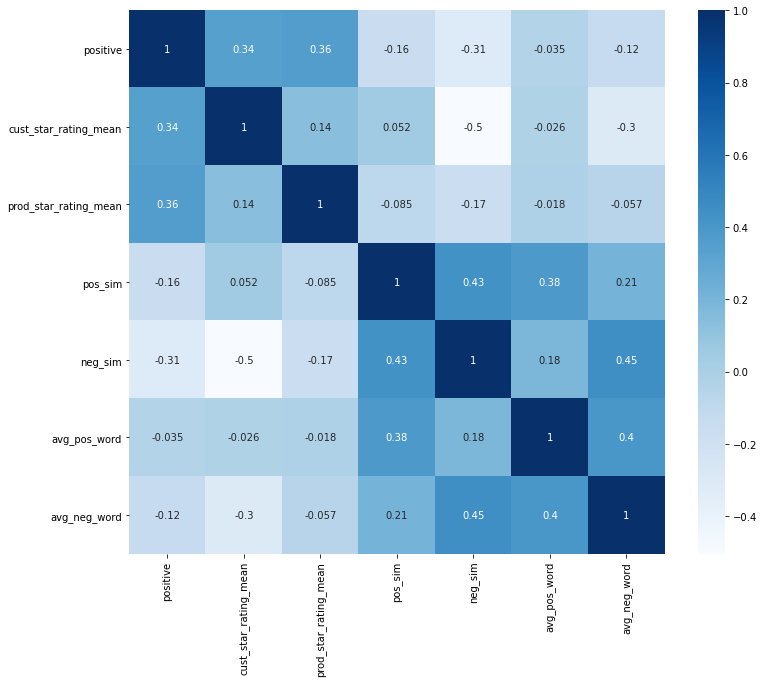

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = train_df.drop(drop_cols, axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(drop_cols, axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
gb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7150694133452754

In [19]:
evaluate(gb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6387 0.7150694133452754
Pos: 4576 0.5123152709359606
True Positive: 3695 0.4136811464397671
True Negative: 2692 0.3013882669055083
False Positive: 881 0.09863412449619346
False Negative: 1664 0.18629646215853113
Positive Precision: 0.8074737762237763
Positive Recall: 0.6894943086396715
Positive F1 Score: 0.7438349270256669
Negative Precision: 0.6179981634527089
Negative Recall: 0.7534284914637559
Negative F1 Score: 0.6790263589355531


In [20]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [21]:
rf.score(test_x.drop(drop_cols, axis=1), test_y)

0.7048813255709807

In [22]:
evaluate(rf, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6296 0.7048813255709807
Pos: 4519 0.5059337214509628
True Positive: 3621 0.4053963278101209
True Negative: 2675 0.29948499776085985
False Positive: 898 0.10053739364084191
False Negative: 1738 0.19458128078817735
Positive Precision: 0.8012834697942023
Positive Recall: 0.6756857622690801
Positive F1 Score: 0.7331443612067221
Negative Precision: 0.6061636075232268
Negative Recall: 0.7486705849426253
Negative F1 Score: 0.6699223641372402


<BarContainer object of 6 artists>

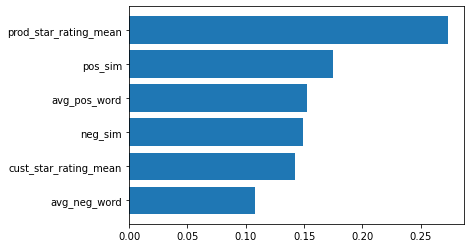

In [23]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [24]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.16059860834105222

In [26]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6241 0.6987236901030004
Pos: 4468 0.5002239140170175
True Positive: 3568 0.3994626063591581
True Negative: 2673 0.29926108374384236
False Positive: 900 0.10076130765785939
False Negative: 1791 0.20051500223914018
Positive Precision: 0.7985675917636527
Positive Recall: 0.6657958574360888
Positive F1 Score: 0.7261626132085072
Negative Precision: 0.5987903225806451
Negative Recall: 0.7481108312342569
Negative F1 Score: 0.6651735722284434


<BarContainer object of 6 artists>

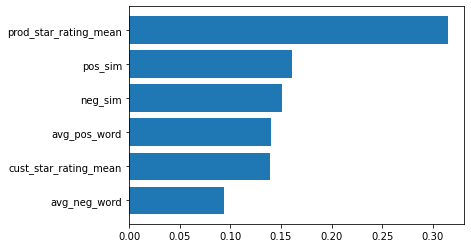

In [27]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [29]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.674205105239588

In [30]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6022 0.674205105239588
Pos: 4679 0.52384684281236
True Positive: 3564 0.39901477832512317
True Negative: 2458 0.2751903269144648
False Positive: 1115 0.1248320644872369
False Negative: 1795 0.2009628302731751
Positive Precision: 0.761701218209019
Positive Recall: 0.665049449524165
Positive F1 Score: 0.7101016138673042
Negative Precision: 0.5779449800141077
Negative Recall: 0.6879373075846628
Negative F1 Score: 0.6281625351392792


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7111509180474698

In [33]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 6352 0.7111509180474698
Pos: 5463 0.6116211374832065
True Positive: 4121 0.46137483206448726
True Negative: 2231 0.24977608598298254
False Positive: 1342 0.15024630541871922
False Negative: 1238 0.138602776533811
Positive Precision: 0.7543474281530295
Positive Recall: 0.7689867512595634
Positive F1 Score: 0.7615967473664758
Negative Precision: 0.6431248198328049
Negative Recall: 0.6244052616848587
Negative F1 Score: 0.6336268105651803


In [44]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

In [45]:
keras.backend.clear_session()

In [46]:
nn_train_x = train_x.drop(drop_cols, axis=1)
nn_test_x = test_x.drop(drop_cols, axis=1)

In [47]:
np.shape(nn_train_x)

(23827, 6)

In [48]:
network = models.Sequential()
network.add(layers.Dense(6, activation='relu', input_shape=(6,)))
network.add(layers.Dense(4, activation='relu', input_shape=(6,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(4,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________


In [49]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 500
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 23827 samples, validate on 8932 samples
Epoch 1/500
23827/23827 [==============================] - 1s 23us/step - loss: 0.6694 - accuracy: 0.6006 - val_loss: 0.6478 - val_accuracy: 0.6022
Epoch 2/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.6469 - accuracy: 0.6093 - val_loss: 0.6404 - val_accuracy: 0.6158
Epoch 3/500
23827/23827 [==============================] - 1s 21us/step - loss: 0.6405 - accuracy: 0.6237 - val_loss: 0.6336 - val_accuracy: 0.6304
Epoch 4/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.6348 - accuracy: 0.6335 - val_loss: 0.6265 - val_accuracy: 0.6405
Epoch 5/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.6292 - accuracy: 0.6387 - val_loss: 0.6219 - val_accuracy: 0.6565
Epoch 6/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.6234 - accuracy: 0.6448 - val_loss: 0.6138 - val_accuracy: 0.6624
Epoch 7/500
23827/23827 [==============================] - 0s 1

Epoch 56/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5346 - accuracy: 0.7389 - val_loss: 0.5453 - val_accuracy: 0.7286
Epoch 57/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5351 - accuracy: 0.7395 - val_loss: 0.5673 - val_accuracy: 0.7160
Epoch 58/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5341 - accuracy: 0.7383 - val_loss: 0.5815 - val_accuracy: 0.7041
Epoch 59/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5347 - accuracy: 0.7389 - val_loss: 0.5553 - val_accuracy: 0.7238
Epoch 60/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5346 - accuracy: 0.7402 - val_loss: 0.5635 - val_accuracy: 0.7181
Epoch 61/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5347 - accuracy: 0.7383 - val_loss: 0.5638 - val_accuracy: 0.7179
Epoch 62/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5343 - accuracy: 0.7383

Epoch 111/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.5336 - accuracy: 0.7403 - val_loss: 0.5616 - val_accuracy: 0.7208
Epoch 112/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5339 - accuracy: 0.7392 - val_loss: 0.5959 - val_accuracy: 0.6937
Epoch 113/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5341 - accuracy: 0.7400 - val_loss: 0.5499 - val_accuracy: 0.7273
Epoch 114/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5335 - accuracy: 0.7405 - val_loss: 0.5498 - val_accuracy: 0.7268
Epoch 115/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5338 - accuracy: 0.7396 - val_loss: 0.5517 - val_accuracy: 0.7258
Epoch 116/500
23827/23827 [==============================] - 1s 22us/step - loss: 0.5338 - accuracy: 0.7387 - val_loss: 0.5740 - val_accuracy: 0.7126
Epoch 117/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5336 - accuracy:

23827/23827 [==============================] - 0s 19us/step - loss: 0.5332 - accuracy: 0.7387 - val_loss: 0.5660 - val_accuracy: 0.7191
Epoch 166/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5330 - accuracy: 0.7391 - val_loss: 0.5460 - val_accuracy: 0.7288
Epoch 167/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5329 - accuracy: 0.7399 - val_loss: 0.5535 - val_accuracy: 0.7241
Epoch 168/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.5333 - accuracy: 0.7385 - val_loss: 0.5729 - val_accuracy: 0.7146
Epoch 169/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5331 - accuracy: 0.7396 - val_loss: 0.5567 - val_accuracy: 0.7245
Epoch 170/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5330 - accuracy: 0.7390 - val_loss: 0.5651 - val_accuracy: 0.7201
Epoch 171/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5332 - accuracy: 0.7388 - val_

Epoch 220/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5317 - accuracy: 0.7383 - val_loss: 0.5540 - val_accuracy: 0.7264
Epoch 221/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5318 - accuracy: 0.7401 - val_loss: 0.5737 - val_accuracy: 0.7144
Epoch 222/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5318 - accuracy: 0.7395 - val_loss: 0.5438 - val_accuracy: 0.7307
Epoch 223/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5316 - accuracy: 0.7394 - val_loss: 0.5688 - val_accuracy: 0.7163
Epoch 224/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5317 - accuracy: 0.7392 - val_loss: 0.5728 - val_accuracy: 0.7133
Epoch 225/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5318 - accuracy: 0.7399 - val_loss: 0.5651 - val_accuracy: 0.7172
Epoch 226/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5314 - accuracy:

23827/23827 [==============================] - 0s 19us/step - loss: 0.5306 - accuracy: 0.7392 - val_loss: 0.5677 - val_accuracy: 0.7179
Epoch 275/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5302 - accuracy: 0.7397 - val_loss: 0.5588 - val_accuracy: 0.7222
Epoch 276/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5302 - accuracy: 0.7408 - val_loss: 0.5486 - val_accuracy: 0.7288
Epoch 277/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5304 - accuracy: 0.7392 - val_loss: 0.5714 - val_accuracy: 0.7150
Epoch 278/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5302 - accuracy: 0.7395 - val_loss: 0.5693 - val_accuracy: 0.7166
Epoch 279/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5304 - accuracy: 0.7399 - val_loss: 0.5725 - val_accuracy: 0.7154
Epoch 280/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5304 - accuracy: 0.7387 - val_

Epoch 329/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5294 - accuracy: 0.7398 - val_loss: 0.5445 - val_accuracy: 0.7314
Epoch 330/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5295 - accuracy: 0.7400 - val_loss: 0.5665 - val_accuracy: 0.7185
Epoch 331/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5293 - accuracy: 0.7402 - val_loss: 0.5581 - val_accuracy: 0.7226
Epoch 332/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5293 - accuracy: 0.7402 - val_loss: 0.5505 - val_accuracy: 0.7283
Epoch 333/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5293 - accuracy: 0.7388 - val_loss: 0.5666 - val_accuracy: 0.7175
Epoch 334/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5293 - accuracy: 0.7407 - val_loss: 0.5534 - val_accuracy: 0.7263
Epoch 335/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5293 - accuracy:

23827/23827 [==============================] - 0s 20us/step - loss: 0.5286 - accuracy: 0.7405 - val_loss: 0.5498 - val_accuracy: 0.7288
Epoch 384/500
23827/23827 [==============================] - 1s 21us/step - loss: 0.5289 - accuracy: 0.7416 - val_loss: 0.5561 - val_accuracy: 0.7256
Epoch 385/500
23827/23827 [==============================] - 1s 23us/step - loss: 0.5288 - accuracy: 0.7403 - val_loss: 0.5600 - val_accuracy: 0.7221
Epoch 386/500
23827/23827 [==============================] - 1s 22us/step - loss: 0.5286 - accuracy: 0.7417 - val_loss: 0.5665 - val_accuracy: 0.7172
Epoch 387/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.5288 - accuracy: 0.7409 - val_loss: 0.5588 - val_accuracy: 0.7240
Epoch 388/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5286 - accuracy: 0.7398 - val_loss: 0.5687 - val_accuracy: 0.7173
Epoch 389/500
23827/23827 [==============================] - 1s 29us/step - loss: 0.5288 - accuracy: 0.7407 - val_

Epoch 438/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5282 - accuracy: 0.7405 - val_loss: 0.5535 - val_accuracy: 0.7265
Epoch 439/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.5283 - accuracy: 0.7406 - val_loss: 0.5533 - val_accuracy: 0.7250
Epoch 440/500
23827/23827 [==============================] - 1s 22us/step - loss: 0.5281 - accuracy: 0.7403 - val_loss: 0.5638 - val_accuracy: 0.7199
Epoch 441/500
23827/23827 [==============================] - 1s 22us/step - loss: 0.5281 - accuracy: 0.7405 - val_loss: 0.5686 - val_accuracy: 0.7190
Epoch 442/500
23827/23827 [==============================] - 1s 23us/step - loss: 0.5281 - accuracy: 0.7409 - val_loss: 0.5668 - val_accuracy: 0.7193
Epoch 443/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5282 - accuracy: 0.7394 - val_loss: 0.5600 - val_accuracy: 0.7203
Epoch 444/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5282 - accuracy:

23827/23827 [==============================] - 0s 21us/step - loss: 0.5276 - accuracy: 0.7418 - val_loss: 0.5580 - val_accuracy: 0.7220
Epoch 493/500
23827/23827 [==============================] - 0s 21us/step - loss: 0.5279 - accuracy: 0.7416 - val_loss: 0.5493 - val_accuracy: 0.7270
Epoch 494/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5279 - accuracy: 0.7403 - val_loss: 0.5614 - val_accuracy: 0.7200
Epoch 495/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5277 - accuracy: 0.7405 - val_loss: 0.5554 - val_accuracy: 0.7237
Epoch 496/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5276 - accuracy: 0.7418 - val_loss: 0.5662 - val_accuracy: 0.7176
Epoch 497/500
23827/23827 [==============================] - 0s 19us/step - loss: 0.5279 - accuracy: 0.7413 - val_loss: 0.5573 - val_accuracy: 0.7232
Epoch 498/500
23827/23827 [==============================] - 0s 20us/step - loss: 0.5277 - accuracy: 0.7411 - val_

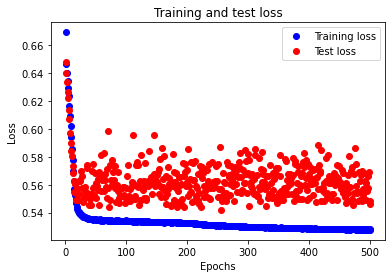

In [50]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

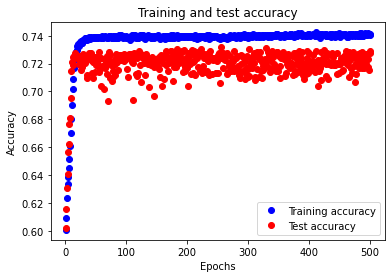

In [51]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [52]:
correct = 0
pos_count = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(test_y)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

pos_f1 = 2 * ((matrix[0] / pos_count) * (matrix[0] / len(test_df[test_df.positive == 1]))) / ((matrix[0] / pos_count) + (matrix[0] / len(test_df[test_df.positive == 1])))
neg_f1 = 2 * ((matrix[1] / (matrix[1] + matrix[3])) * (matrix[1] / (len(test_df[test_df.positive == 0])))) / ((matrix[1] / (matrix[1] + matrix[3])) + (matrix[1] / (len(test_df[test_df.positive == 0]))))
print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))
print('Positive Precision:', matrix[0] / pos_count)
print('Positive Recall:', matrix[0] / len(test_df[test_df.positive == 1]))
print('Positive F1 Score:', pos_f1)
print('Negative Precision:', matrix[1] / (matrix[1] + matrix[3]))
print('Negative Recall:', matrix[1] / (len(test_df[test_df.positive == 0])))
print('Negative F1 Score:', neg_f1)

Correct: 6513 0.7291759964173757
Pos: 5506 0.6164352888490819
True Positive: 4223 0.472794446932378
True Negative: 2290 0.25638154948499775
False Positive: 1283 0.14364084191670398
False Negative: 1136 0.12718316166592028
Positive Precision: 0.7669814747548129
Positive Recall: 0.7880201530136219
Positive F1 Score: 0.7773584905660378
Negative Precision: 0.6684179801517806
Negative Recall: 0.6409179960817241
Negative F1 Score: 0.654379197028147


In [53]:
#network.save('basic_neural_net8.h5')